In [1]:
options(warn = -1)

In [2]:
library(rgdal)
library(readxl)
library(dplyr)
library(tools)
library(lubridate)
library(stringr)

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following

In [3]:
source("functions.R")

In [4]:
path <- "T:/Data/LTD Data/BikeOnBuses/Monthly/"

In [5]:
excel_sheets(paste0(path,"LTD Bike Count_2013.xlsx"))

[1] "bike count_Jan13"  "bike count_Feb13"  "bike count_Mar13" 
 [4] "bike count_May13"  "bike count_Jun13"  "bike count_Jul13" 
 [7] "bike count_Aug13"  "bike count_Sept13" "bike count_Nov13" 
[10] "bike count_Dec13"

In [6]:
files <- file_path_sans_ext(list.files(path))

In [7]:
for(file in files){
    if(file == "LTD Bike Count_2013"){
        data <- readExcel(fileName=paste0(file, ".xlsx"))
    }else{
        ndata <- readExcel(fileName=paste0(file, ".xlsx"))
        data <- rbind(data, ndata)
    }
    print(file)
}

[1] "LTD Bike Count_2013"
[1] "LTD Bike Count_2014"
[1] "LTD Bike Count_2015"
[1] "LTD Bike Count_2016"
[1] "LTD Bike Count_2017"
[1] "LTD Bike Count_2018"
[1] "LTD Bike Count_2019"
[1] "LTD Bike Count_2020"
[1] "LTD Bike Count_2021"


In [8]:
tail(data)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
827717,09971,wkd,2021-11-09,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,International Center Station Inbound,20105,190.36,bike inside bus,1,November 2021,-123.0363,44.08847
827718,09972,wkd,2021-11-05,911,1899-12-31 16:57:00,1899-12-31 15:53:00,EmX,I,International Way Station West Inbound,15104,102.96,bike inside bus,1,November 2021,-123.0420,44.08849
827719,09972,wkd,2021-11-11,912,1899-12-31 15:58:00,1899-12-31 14:55:00,EmX,I,International Way Station West Inbound,9102,99.32,bike inside bus,1,November 2021,-123.0420,44.08849
827720,09972,sun,2021-11-14,1901,1899-12-31 08:47:00,1899-12-31 07:50:00,EmX,I,International Way Station West Inbound,9104,5.08,bike on rack,1,November 2021,-123.0420,44.08849
827721,09973,wkd,2021-11-02,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,Pavilion Station Inbound,6102,191.36,bike inside bus,1,November 2021,-123.0281,44.08289
827722,09973,wkd,2021-11-05,901,1899-12-31 22:48:00,1899-12-31 21:52:00,EmX,I,Pavilion Station Inbound,9104,191.34,bike on rack,1,November 2021,-123.0281,44.08289


In [1]:
# reorganize bikes on buses data due to missed April and October data
#data <- read.csv('T:/Tableau/tableauBikesOnBuses/Datasources/MonthlyBikesOnBuses.csv')

In [9]:
months <- c("April", "October")
years <- 2013:2019

In [11]:
for(year in years){
    if(year==2017){
        ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                        fileName = paste0(year, ".xlsx"),
                        sheetName = "bike counts")
        df <- rbind(df, ndf)
        print(year)
    }else{
        for(month in months){
            if(year==2013 & month=="April"){
                df <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
            }else{
                ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
                if(year==2013 & month=="October"){
                    df <- rbind(ndf, df)
                }else{
                    df <- rbind(df, ndf)
                }  
            }
            print(paste(year, month))
        }  
    }

}

[1] "2013 April"
[1] "2013 October"
[1] "2014 April"
[1] "2014 October"
[1] "2015 April"
[1] "2015 October"
[1] "2016 April"
[1] "2016 October"
[1] 2017
[1] "2018 April"
[1] "2018 October"
[1] "2019 April"
[1] "2019 October"


In [14]:
test <- readExcel(path = "T:/Data/LTD Data/BoardingSince2011/", 
          fileName = "April 2013.xlsx",
          sheets = "bike counts")

In [18]:
test <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
        fileName = "October 2013.xlsx",
        sheetName = "bike counts")

In [12]:
df <- df[month(df$date) %in% c(4, 10),]

In [15]:
data <- rbind(data, df)

In [ ]:
data <- rbind(data, df)

In [40]:
dim(data)

[1] 1015164      16

In [41]:
data <- unique(data)

In [42]:
dim(data)

[1] 988126     16

In [43]:
write.csv(data, paste0('T:/Tableau/tableauBikesOnBuses/Datasources/MonthlyBikesOnBuses.csv'), row.names = FALSE)

In [15]:
data <- rbind(data, data[,names(missed)])

ERROR: Error in `[.data.frame`(data, , names(missed)): undefined columns selected


In [125]:
#data <- data[year(data$date) != 2021 & data$dir == 'O',]

In [32]:
df <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0("April 2013.xlsx"),
                            sheetName = "bike counts")

In [21]:
ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0("October 2013.xlsx"),
                            sheetName = "bike counts")

In [28]:
names(df) == names(ndf)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE

In [23]:
names(ndf)

[1] "stop"      "srv"       "date"      "block"     "trip_end"  "time"     
 [7] "route"     "dir"       "stop_name" "bus"       "odometer"  "desc"     
[13] "qty"       "MonthYear" "longitude" "latitude"

In [25]:
head(df)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,00001,wkd,2013-04-24,65,2022-01-06 17:52:00,2022-01-06 17:41:00,11,O,E/S of 58th N of Main,7104,136.63,bike on rack,1,April 2013,-122.9267,44.04634
2,00001,wkd,2013-04-25,67,2022-01-06 12:18:00,2022-01-06 12:05:00,11,O,E/S of 58th N of Main,1003,19.46,bike on rack,1,April 2013,-122.9267,44.04634
3,00001,sat,2013-04-20,7001,2022-01-06 17:34:00,2022-01-06 17:26:00,11,O,E/S of 58th N of Main,7105,150.85,bike on rack,1,April 2013,-122.9267,44.04634
4,00001,wkd,2013-04-26,2,2022-01-06 10:56:00,2022-01-06 10:47:00,11,O,E/S of 58th N of Main,325,84.26,bike on rack,1,April 2013,-122.9267,44.04634
5,00002,wkd,2013-04-24,52,2022-01-06 15:42:00,2022-01-06 15:27:00,11,O,E/S of 58th S of D,6218,97.73,bike on rack,1,April 2013,-122.9262,44.04946
6,00004,wkd,2013-04-19,16,2022-01-06 15:35:00,2022-01-06 15:20:00,11,O,E/S of 58th S of Thurston Rd,7105,153.68,bike on rack,2,April 2013,-122.9262,44.05225


In [26]:
head(ndf)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,00001,wkd,2013-10-01,93,1899-12-31 15:35:00,1899-12-31 15:22:00,11,O,E/S of 58th N of Main,1002,6.34,bike on rack,1,October 2013,-122.9267,44.04634
2,00001,wkd,2013-10-30,67,1899-12-31 16:25:00,1899-12-31 16:09:00,11,O,E/S of 58th N of Main,1001,112.83,bike on rack,1,October 2013,-122.9267,44.04634
3,00001,sat,2013-10-05,7014,1899-12-31 17:49:00,1899-12-31 17:41:00,11,O,E/S of 58th N of Main,7101,137.64,bike on rack,1,October 2013,-122.9267,44.04634
4,00002,sat,2013-10-12,7003,1899-12-31 12:05:00,1899-12-31 11:52:00,11,O,E/S of 58th S of D,7103,72.26,bike on rack,1,October 2013,-122.9262,44.04946
5,00004,wkd,2013-10-23,42,1899-12-31 07:14:00,1899-12-31 07:05:00,11,O,E/S of 58th S of Thurston Rd,772,6.68,bike on rack,1,October 2013,-122.9262,44.05225
6,00004,wkd,2013-10-16,90,1899-12-31 16:35:00,1899-12-31 16:22:00,11,O,E/S of 58th S of Thurston Rd,6219,19.81,bike on rack,1,October 2013,-122.9262,44.05225


In [78]:
head(data)

srv,date,block,trip_end,time,route,dir,stop,stop_name,latitude,longitude,bus,odometer,desc,qty,MonthYear,DailyRtQty,DailyQty
<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
wkd,2013-01-02,1,1899-12-31 06:00:00,1899-12-31 05:23:00,91,O,9249,S/S of Hwy 126 (MP 23.41) E of Mt View Lane,44.13080,-122.6172,151,29.47,bike on rack,1,January 2013,3,549
wkd,2013-01-02,1,1899-12-31 09:25:00,1899-12-31 09:01:00,40,I,816,S/S of Royal W of Ruskin,44.06990,-123.1671,151,8.20,bike on rack,1,January 2013,31,549
wkd,2013-01-02,1,1899-12-31 10:25:00,1899-12-31 10:11:00,36,I,404,S/S of 18th W of McKinley,44.04052,-123.1305,151,23.13,bike on rack,1,January 2013,20,549
wkd,2013-01-02,2,1899-12-31 05:21:00,1899-12-31 05:21:00,11,O,17,N/S of Main E of 62nd Pl,44.04573,-122.9181,1114,9.15,bike on rack,2,January 2013,93,549
wkd,2013-01-02,2,1899-12-31 05:37:00,1899-12-31 05:26:00,11,I,26,N/S of Main E of 50th,44.04582,-122.9434,1114,10.62,bike on rack,1,January 2013,93,549
wkd,2013-01-02,2,1899-12-31 06:37:00,1899-12-31 06:20:00,11,I,26,N/S of Main E of 50th,44.04581,-122.9433,1114,23.75,bike on rack,1,January 2013,93,549


In [79]:
names(data)

[1] "srv"        "date"       "block"      "trip_end"   "time"      
 [6] "route"      "dir"        "stop"       "stop_name"  "latitude"  
[11] "longitude"  "bus"        "odometer"   "desc"       "qty"       
[16] "MonthYear"  "DailyRtQty" "DailyQty"

In [17]:
range(data$date)

[1] "2013-01-02 UTC" "2021-11-15 UTC"

In [18]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [19]:
dim(data)

[1] 1015164      16

In [44]:
length(unique(data$route))

[1] 36

In [86]:
aggdata <- aggregate(x=list(qty = data$qty), by=list(stop_name = data$stop_name), FUN=sum)

In [87]:
locdata <- aggregate(x=list(latitude = data$latitude, longitude= data$longitude), 
                     by=list(stop_name = data$stop_name), FUN=first)

In [88]:
aggdata <- merge(aggdata, locdata, by='stop_name')

In [89]:
spdf <- df2spdf(aggdata, 'longitude', 'latitude')

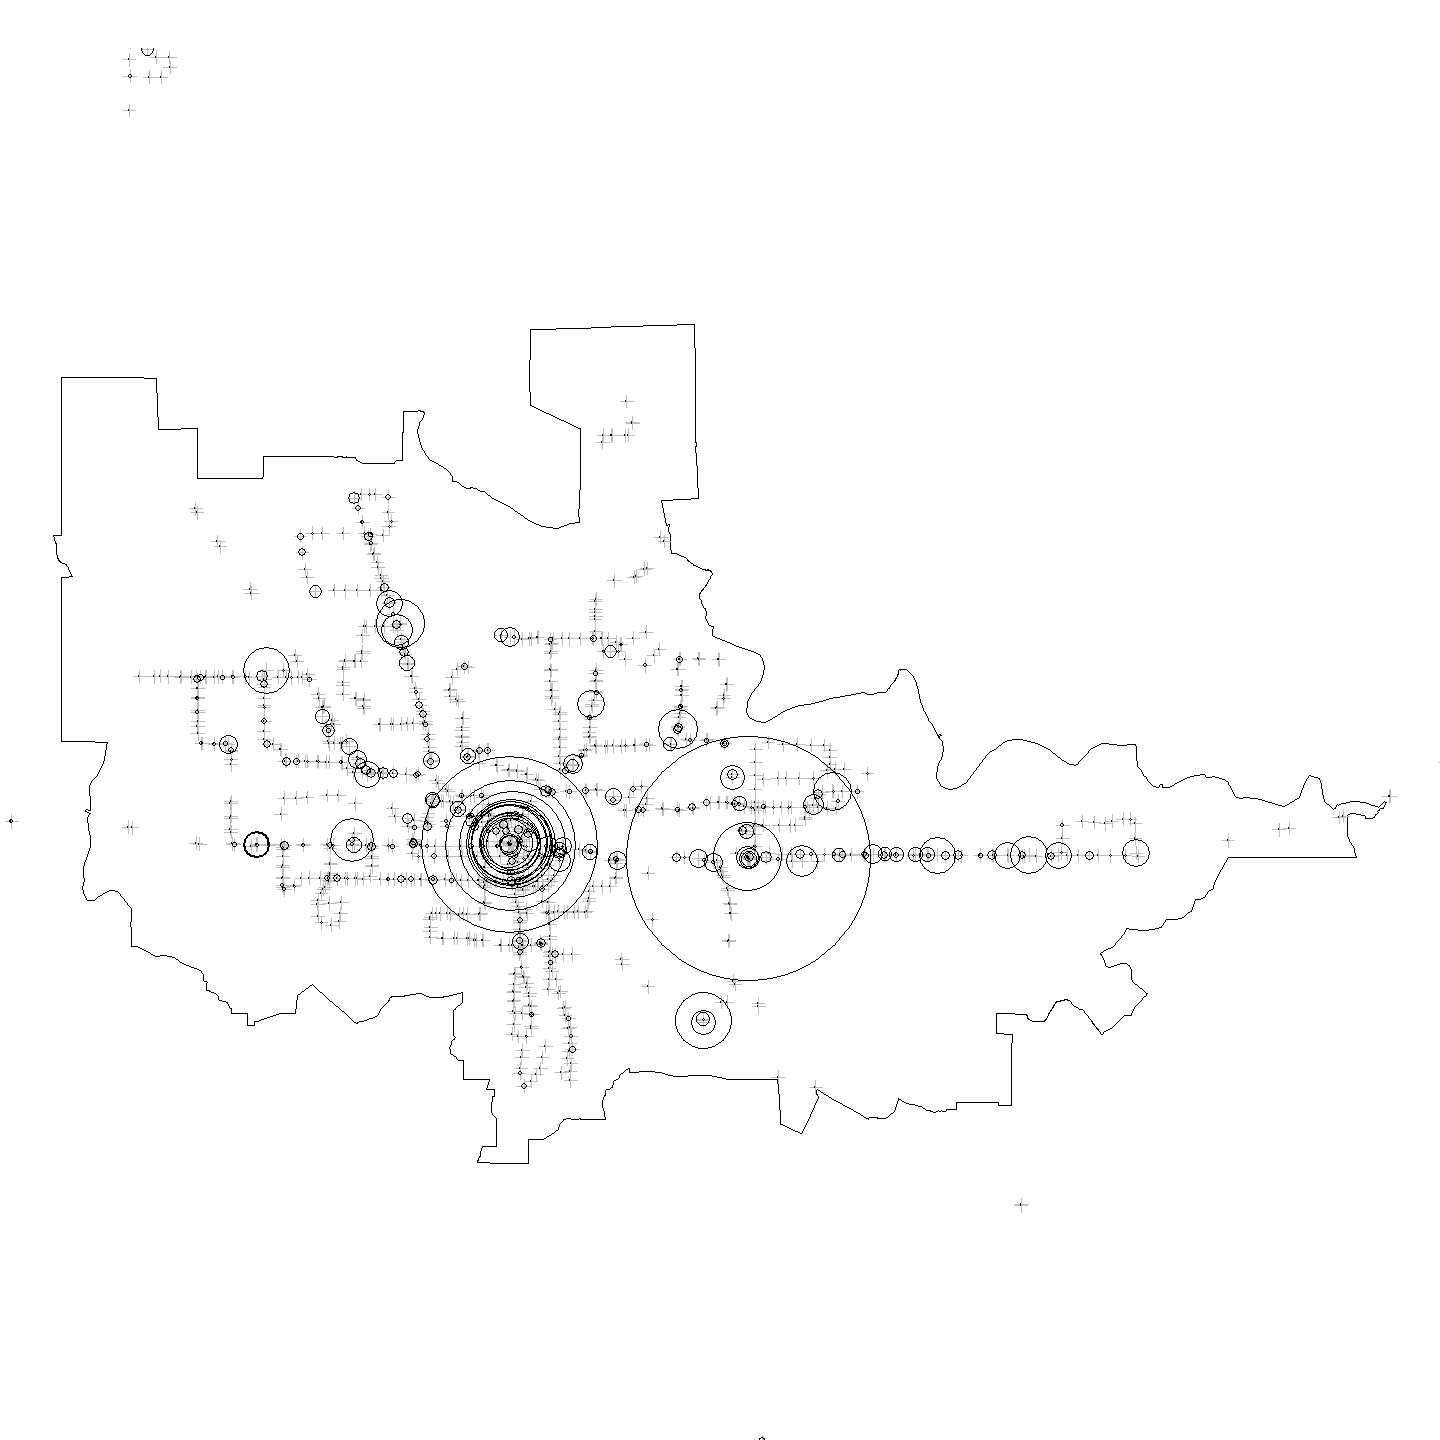

In [90]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/2000)

In [50]:
spdf@data <- spdf@data[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), spdf@data$stop_name),]

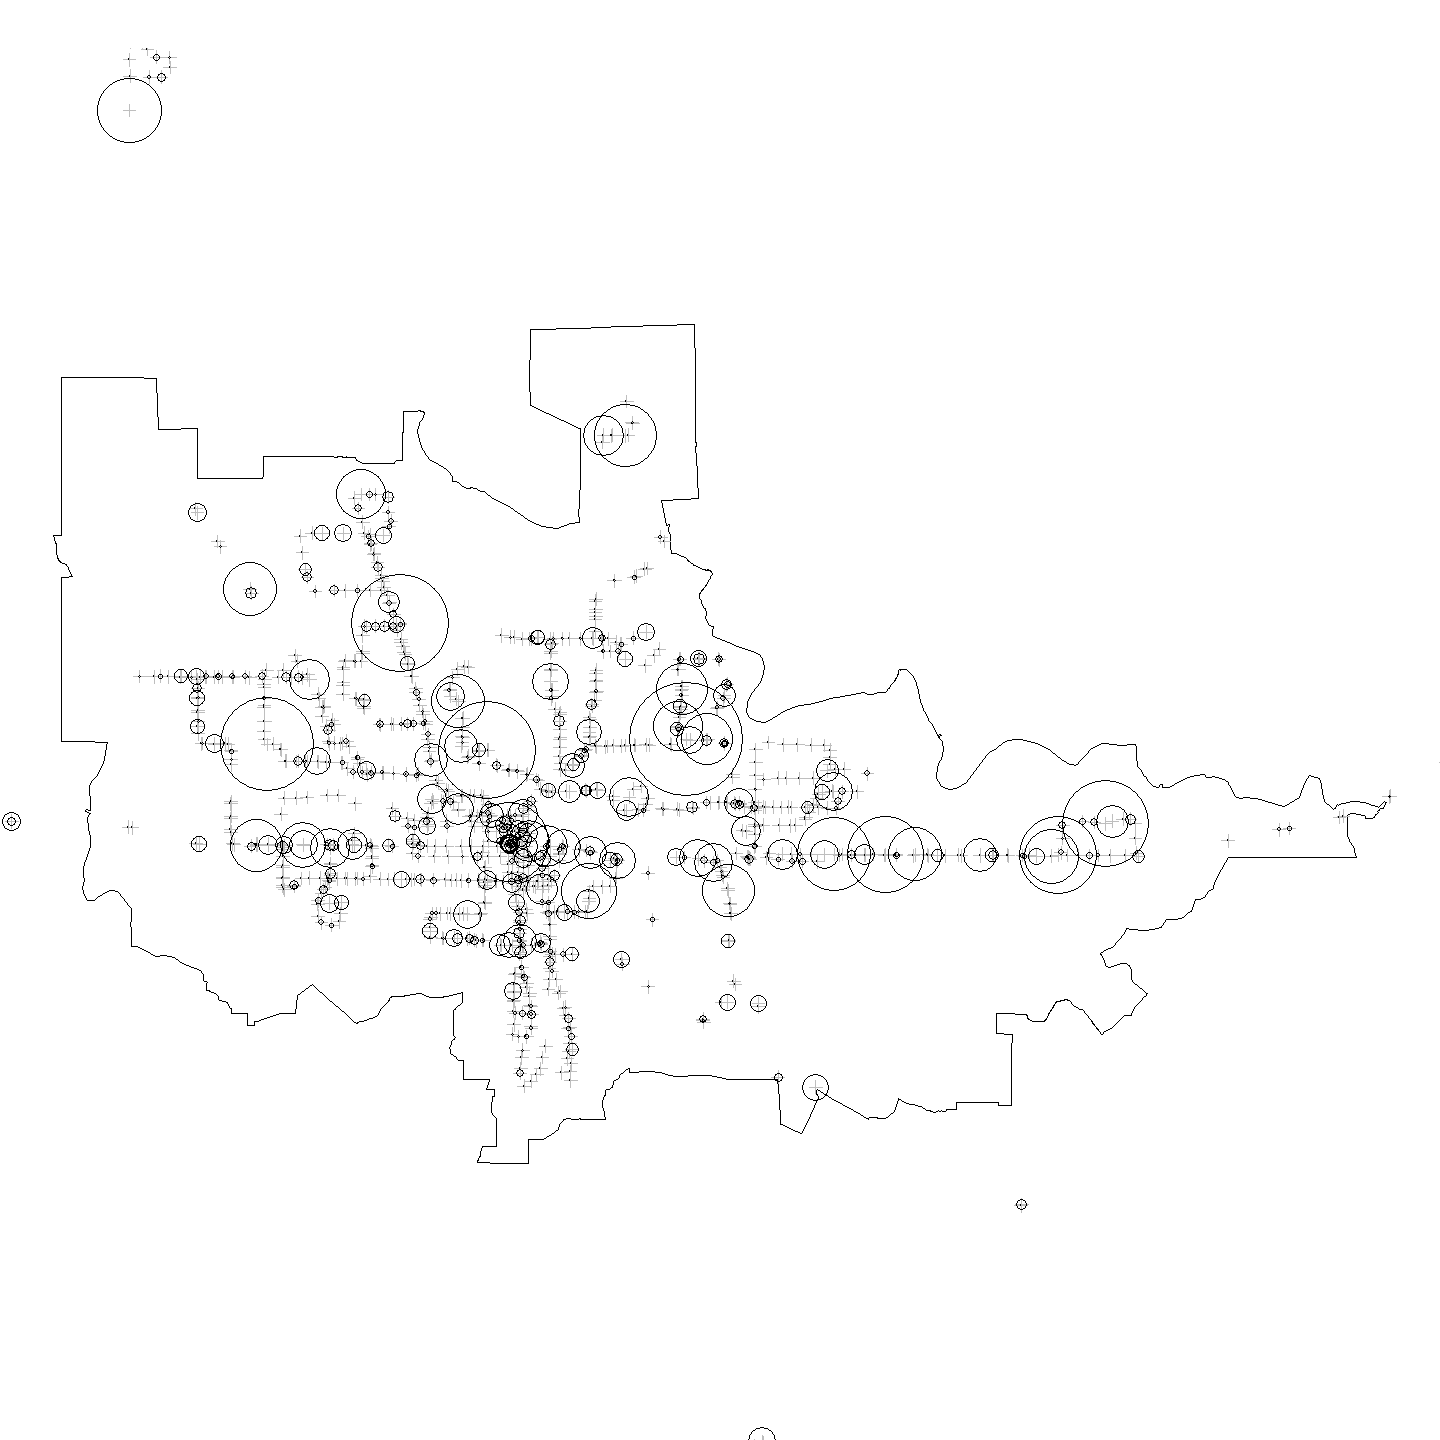

In [51]:
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/1000)

In [94]:
outdata <- aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date), Location = data$stop_name), FUN=sum)

In [95]:
head(locdata)

,stop_name,latitude,longitude
,<chr>,<dbl>,<dbl>
1,"""E"" Street Station",44.05092,-123.0221
2,"""F"" Street Station",44.05118,-123.0232
3,"""Q"" Street Station inbound",44.06277,-123.0262
4,"""Q"" Street Station outbound",44.06332,-123.0262
5,(^) N/S of Hwy 126 (MP 23.8) W of Leaburg Dam,44.13587,-122.6134
6,(^) N/S of Lost Crk (Dexter),43.91483,-122.8129


In [97]:
head(locdata)

,stop_name,latitude,longitude
,<chr>,<dbl>,<dbl>
1,"""E"" Street Station",44.05092,-123.0221
2,"""F"" Street Station",44.05118,-123.0232
3,"""Q"" Street Station inbound",44.06277,-123.0262
4,"""Q"" Street Station outbound",44.06332,-123.0262
5,(^) N/S of Hwy 126 (MP 23.8) W of Leaburg Dam,44.13587,-122.6134
6,(^) N/S of Lost Crk (Dexter),43.91483,-122.8129


In [98]:
names(locdata) <- c('Location', 'Latitude', 'Longitude')

In [99]:
outdata <- merge(outdata, locdata, by = 'Location')

In [100]:
dim(outdata)

[1] 9536    5

In [101]:
outdata <- outdata[rev(order(outdata$Counts)),]

In [102]:
sdata <- outdata[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), outdata$Location),]

In [124]:
head(outdata)

,Location,Year,Counts,Latitude,Longitude,Growth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7453,"Springfield Station, Bay E",2013,9079,44.04501,-123.0215,NA
7454,"Springfield Station, Bay E",2014,8823,44.04501,-123.0215,-0.02819694
7455,"Springfield Station, Bay E",2015,7840,44.04501,-123.0215,-0.11141335
2317,"Eugene Station, Bay E",2013,7032,44.04807,-123.0938,NA
2318,"Eugene Station, Bay E",2014,6860,44.04807,-123.0938,-0.02445961
7458,"Springfield Station, Bay E",2018,6380,44.04501,-123.0215,0.03186156


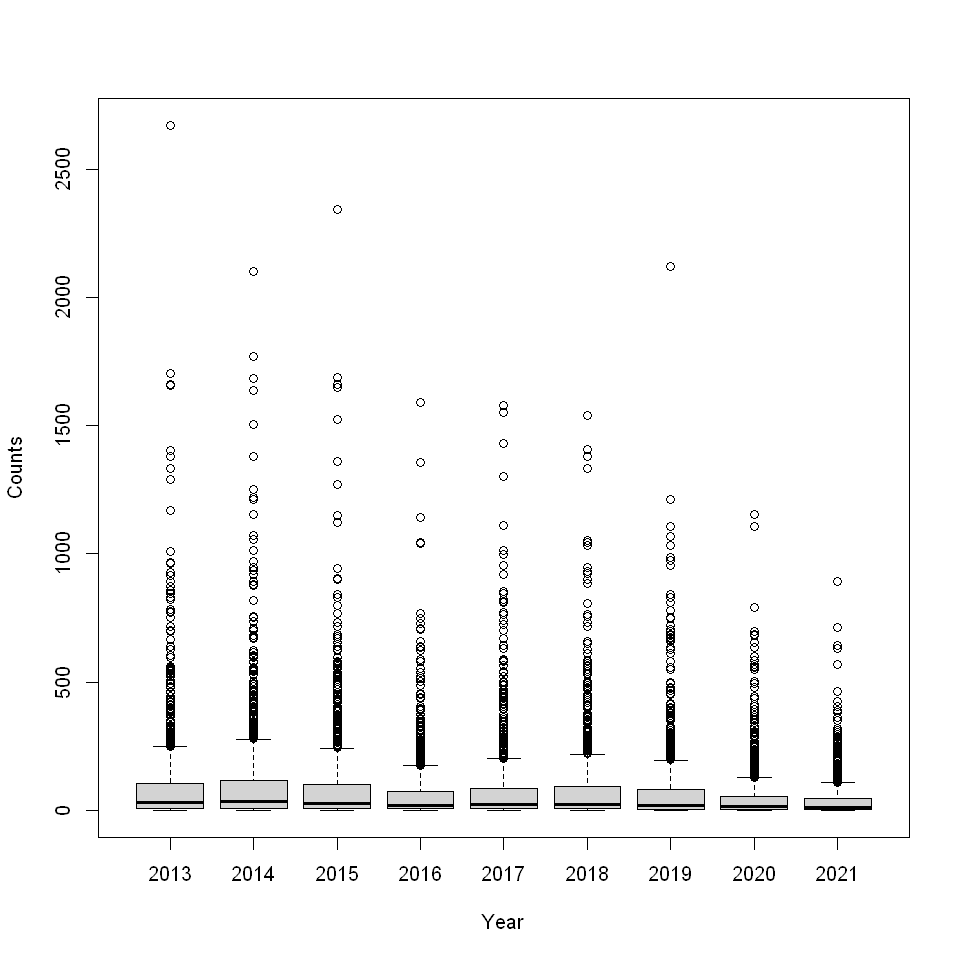

In [104]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(Counts~Year,data=sdata)

In [105]:
#outdata$Growth <- with(outdata[,c('Location', 'Year', 'Counts')], ave(Counts, Location,
#                     FUN=function(x) c(NA, diff(x)/x[-length(x)]) ))

In [107]:
unique(outdata$Year)

[1] 2013 2014 2015 2018 2017 2019 2016 2020 2021

In [111]:
min(sort(unique(outdata$Year)))

[1] 2013

In [112]:
names(outdata)

[1] "Location"  "Year"      "Counts"    "Latitude"  "Longitude" "Growth"

In [121]:
for(loc in unique(outdata$Location)){
    years <- sort(unique(outdata[outdata$Location == loc,"Year"]))
    for(yr in years){
        if(yr==min(years)){
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- NA
        }else{
            i <- which(years==yr)
            x1 <- outdata[outdata$Location==loc & outdata$Year==yr,"Counts"]
            x2 <- outdata[outdata$Location==loc & outdata$Year==years[i-1],"Counts"]
            n <- yr - years[i-1]
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- (x1-x2)/(n*x2)
        }
    }
}

In [125]:
write.csv(outdata, paste0('T:/Tableau/tableauBikesOnBuses/Datasources/AggregatedBikesOnBuses.csv'), row.names = FALSE)

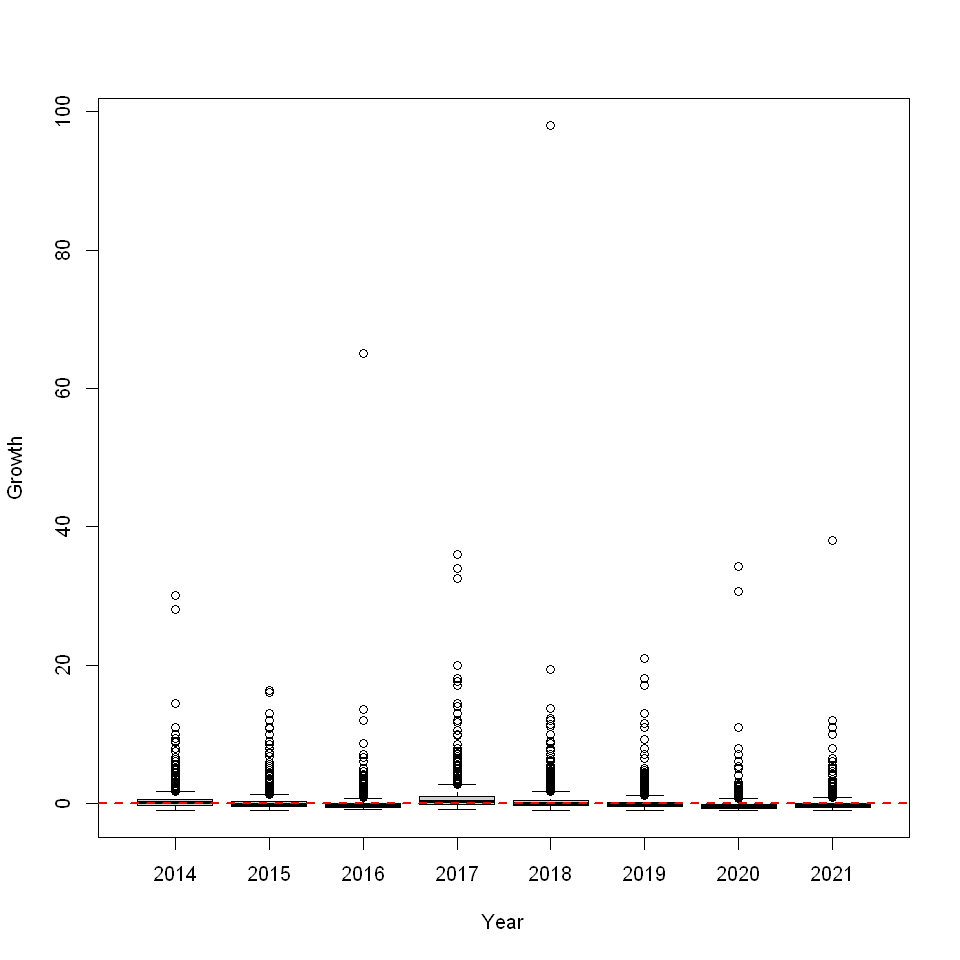

In [123]:
boxplot(Growth~Year,data=outdata)
abline(h=0, col='red', lwd=2, lty=2)

In [63]:
head(data)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,00001,wkd,2013-01-18,67,1899-12-31 18:21:00,1899-12-31 18:10:00,11,O,E/S of 58th N of Main,1002,98.11,bike on rack,1,January 2013,-122.9267,44.04634
2,00001,wkd,2013-01-10,2,1899-12-31 09:56:00,1899-12-31 09:44:00,11,O,E/S of 58th N of Main,1114,71.08,bike on rack,1,January 2013,-122.9267,44.04634
3,00001,wkd,2013-01-10,60,1899-12-31 16:54:00,1899-12-31 16:45:00,11,O,E/S of 58th N of Main,7102,119.29,bike on rack,1,January 2013,-122.9267,44.04634
4,00001,wkd,2013-01-29,60,1899-12-31 17:52:00,1899-12-31 17:39:00,11,O,E/S of 58th N of Main,7102,132.76,bike on rack,1,January 2013,-122.9267,44.04634
5,00001,wkd,2013-01-09,25,1899-12-31 15:35:00,1899-12-31 15:20:00,11,O,E/S of 58th N of Main,1004,126.65,bike on rack,1,January 2013,-122.9267,44.04634
6,00002,wkd,2013-01-30,48,1899-12-31 08:27:00,1899-12-31 08:13:00,11,O,E/S of 58th S of D,6218,5.11,bike on rack,1,January 2013,-122.9262,44.04946


In [64]:
df <- transform(aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date)), FUN=sum), Growth=ave(Counts, 
                         FUN=function(x) c(NA, diff(x)/x[-length(x)])))

In [65]:
df

Year,Counts,Growth
<dbl>,<dbl>,<dbl>
2013,173635,NA
2014,183700,0.057966424
2015,163960,-0.107457812
2016,114387,-0.302348134
2017,138272,0.208808693
2018,136964,-0.009459616
2019,120353,-0.121280044
2020,70859,-0.411240268
2021,49999,-0.294387445
